<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Mercury_Orbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

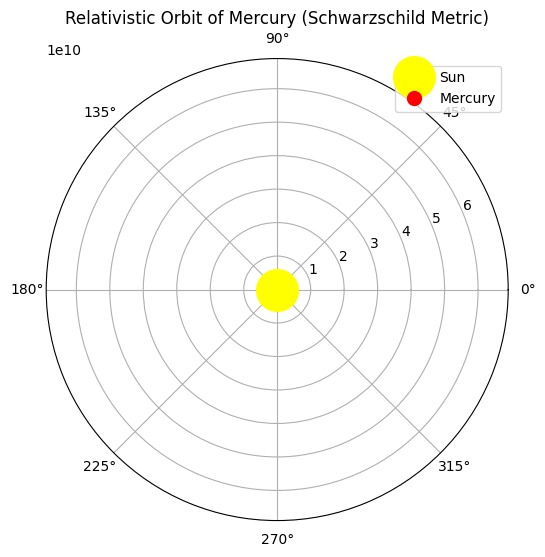

In [4]:
!pip install matplotlib

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants for the simulation
G = 6.67430e-11         # Gravitational constant, m^3 kg^-1 s^-2
M = 1.989e30            # Mass of the Sun, kg
c = 299792458           # Speed of light, m/s
AU = 1.496e11           # Astronomical unit in meters
perihelion_distance = 4.6e10  # Perihelion of Mercury in meters

# Simulation parameters
num_points = 2000       # Number of points for orbit
theta_max = 12 * np.pi  # Total angle to cover (over many orbits)
dt = theta_max / num_points

# Constants derived for the Schwarzschild orbit
L = perihelion_distance * 5.79e10  # Effective angular momentum, exaggerated for illustration
alpha = (3 * G * M) / (c**2 * perihelion_distance)  # Schwarzschild precession term

# Arrays for theta and radial distance r
theta = np.linspace(0, theta_max, num_points)
r = np.zeros(num_points)
r[0] = perihelion_distance

# Solve orbit equation under Schwarzschild metric (approximate solution)
for i in range(1, num_points):
    r[i] = perihelion_distance / (1 + 0.205 * np.cos(theta[i]) + alpha * theta[i])

# Setting up the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
ax.set_ylim(0, 1.5 * perihelion_distance)
ax.set_title("Relativistic Orbit of Mercury (Schwarzschild Metric)")

# Add the Sun at the center
sun, = ax.plot(0, 0, 'o', color='yellow', markersize=30, label='Sun')

# Initialize the line and point for the orbit
line, = ax.plot([], [], lw=1.5, color='orange')
point, = ax.plot([], [], 'o', color='red', markersize=10, label='Mercury')

# Initialization function to set up background
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Animation function to update each frame
def animate(i):
    # Set the line to show the orbit path up to the current point
    line.set_data(theta[:i], r[:i])
    # Set the point to the current position of Mercury in its orbit
    point.set_data(theta[i], r[i])
    return line, point

# Call the animator with init_func defined
ani = animation.FuncAnimation(fig, animate, frames=num_points, init_func=init, interval=10, blit=True)

# Display the animation
plt.legend(loc="upper right")
plt.show()



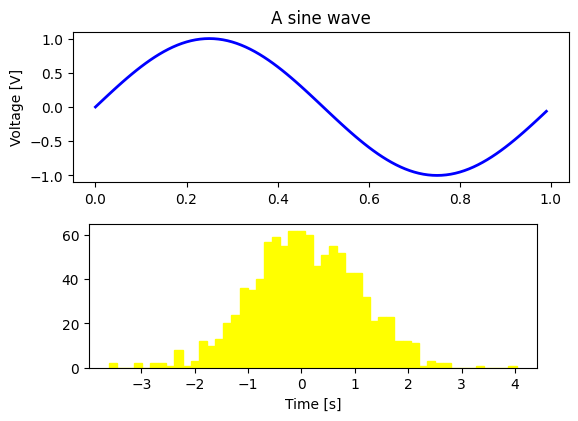

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Voltage [V]')
ax1.set_title('A sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('Time [s]')

plt.show()